# Seaborn

## Aspectos generales

Seaborn es un paquete basado en Matplotlib, que provee una interfaz de más alto nivel para hacer gráficos y utiliza fuertemente Pandas como fuente de datos. La estructura de seaborn radica en tres módulos:

1. Relaciones
2. Distribuciones
3. Categóricos

Para cada tipo de módulo existen funciones a nivel de ejes y a nivel de figura. 

Por ejemplo, una función "a nivel de ejes" en el módulo de distribuciones es la que hace un histograma:

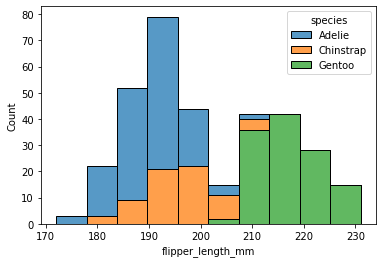

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

pero existe otra que hace una estimación por kernel de la densidad:

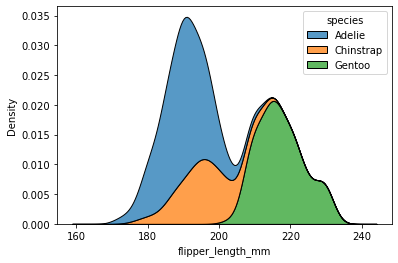

In [2]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

pero existe una función "a nivel de figura" que puede hacer ambas, con algunas diferencias en formato:

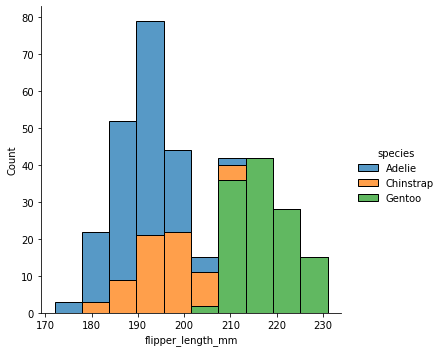

In [3]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

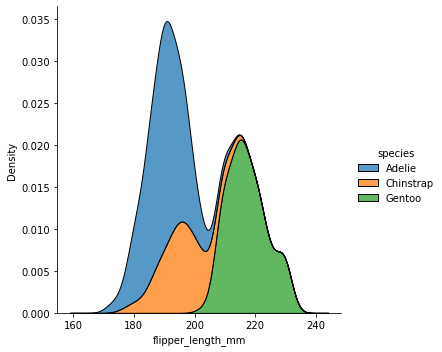

In [4]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde");

La mayor ventaja de los gráficos "a nivel de figura" es que se pueden crear fácilmente facets:

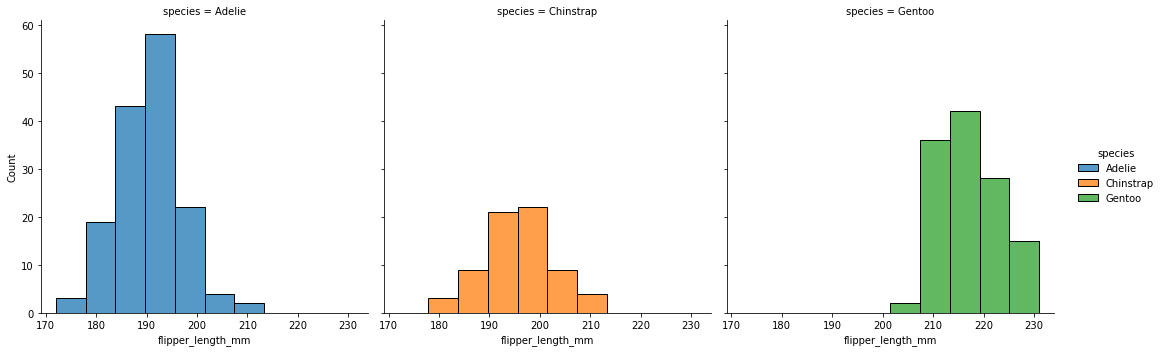

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species");

Las funciones a nivel de ejes se pueden considerar como "wrappers" de gráficos de Matplotlib, por lo tanto pueden ser "arreglados" en un objeto tipo ejes (axes):

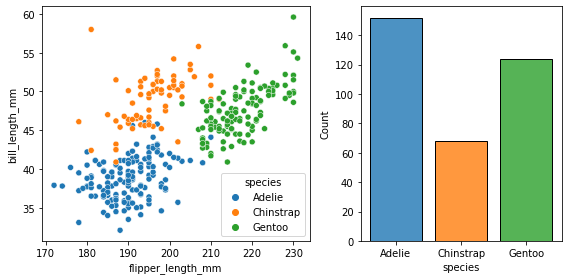

In [6]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()


Para resumir los tres módulos con sus gráficos a nivel de figura y ejes:

![alt text](data/function_overview_8_0.png)

Los gráficos a nivel de figura pueden ser configurados a través de sus métodos:

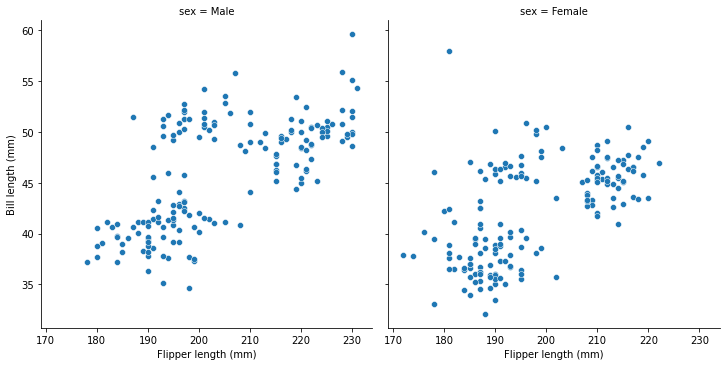

In [7]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)");


y estos ofrecen mayores ventajas a la hora de configurarlos con respecto a los gráficos a nivel de ejes. 

Existen dos excepciones a la clasificación anterior de gráficos en seaborn: `jointplot()` y `pairplot()`: 

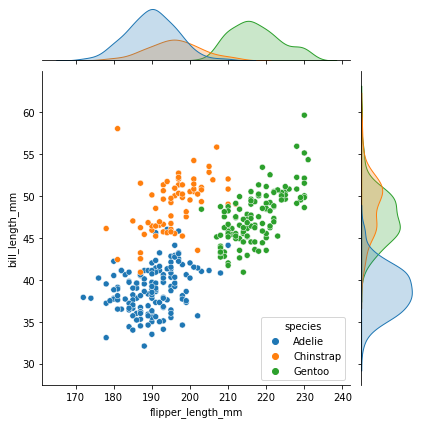

In [8]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

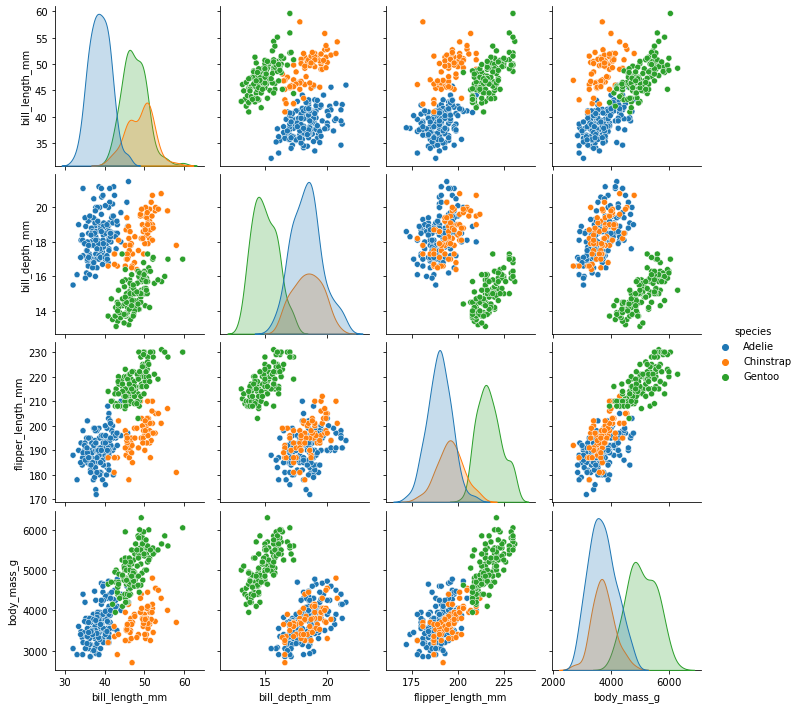

In [9]:
sns.pairplot(data=penguins, hue="species");

## Estructuras de datos utilizadas en seaborn

Seaborn acepta tablas en formato largo:

In [10]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


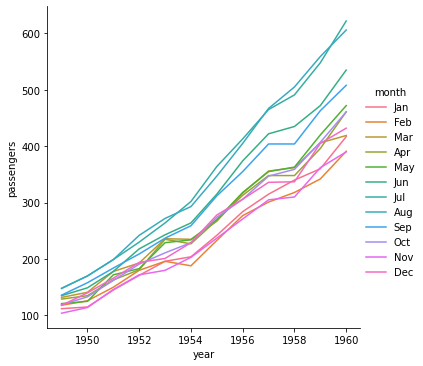

In [11]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line");

Seaborn también acepta datos en formato ancho (típico de tablas pivot):

In [12]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


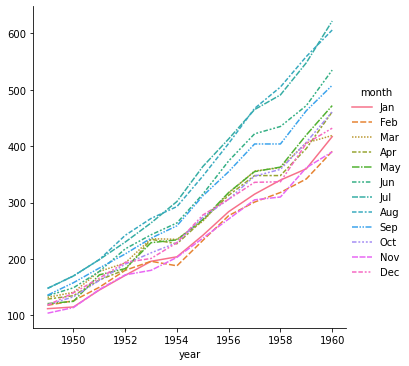

In [13]:
sns.relplot(data=flights_wide, kind="line");

En este ejemplo también podemos graficar el comportamiento de la serie mensual en los distintos años. Primero usando los datos en formato largo:

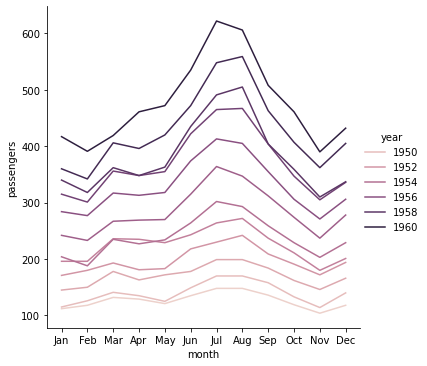

In [14]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line");

y también en formato ancho (noten que en este caso hay que transponer el DataFrame paa que los ejes aparezcan correctamente):

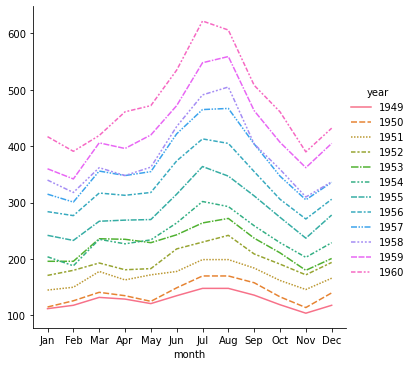

In [15]:
sns.relplot(data=flights_wide.transpose(), kind="line");

Seaborn no solamente utiliza DataFrames y Series de Pandas, sino también se puede usar diccionarios y arrays de NumPy. También se puede usar DataFrames que hayan sido obtenidos usando operaciones de agrupamiento:

In [16]:
flights_avg = flights.groupby("year").mean()
flights_avg.head()

,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000


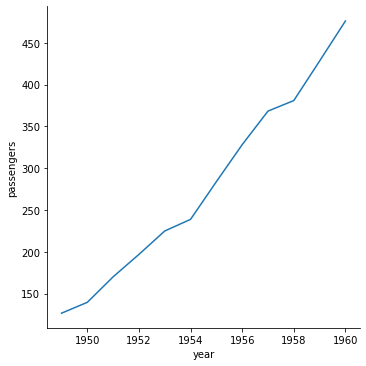

In [17]:
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line");

Las series pueden tener distinta longuitud, siempre y cuando tengan un índice en común:

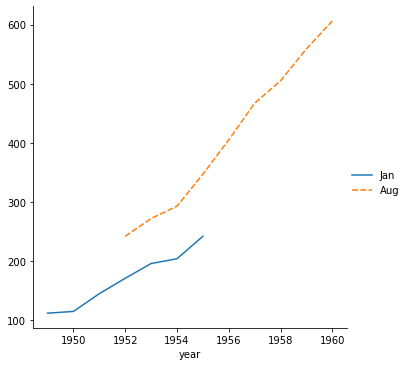

In [18]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind="line");

Si se usan arrays de NumPy con seaborn, los gráficos son indexados de manera ordinal:

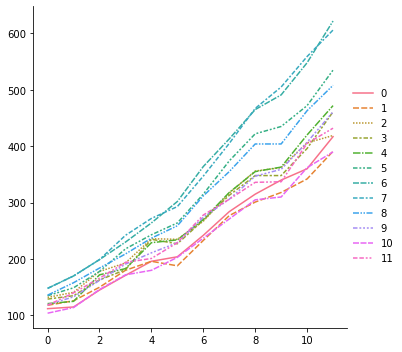

In [19]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line");

# Visualizando relaciones estadísticas

En la sección vimos como podemos gráficar a nivel de ejes y a nivel de figuras.

La función `relplot` es la función más básica a nivel de ejes para dibujar datos. (http://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplt) 

Esta función tiene dos modos `kind="scatter"` (defecto) o `kind="line"`.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [21]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


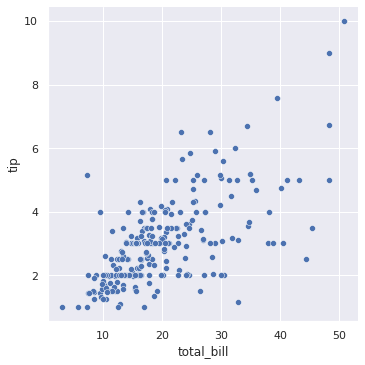

In [22]:
sns.relplot(x="total_bill", y="tip", data=tips);

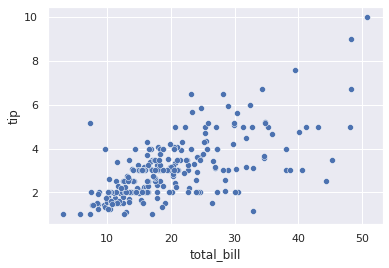

In [23]:
sns.scatterplot(x="total_bill", y="tip", data=tips);

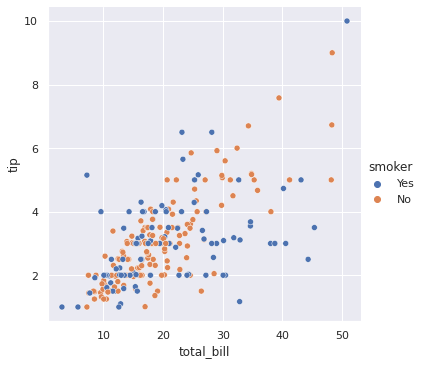

In [24]:
# Agregar dimensiones extra con colores
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

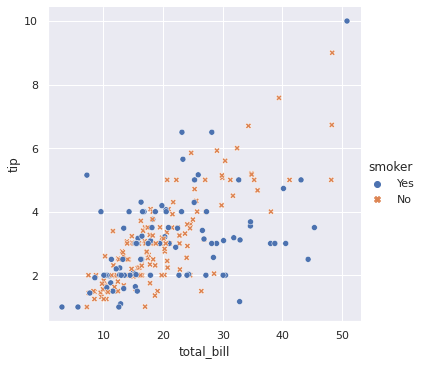

In [25]:
# Con formas
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

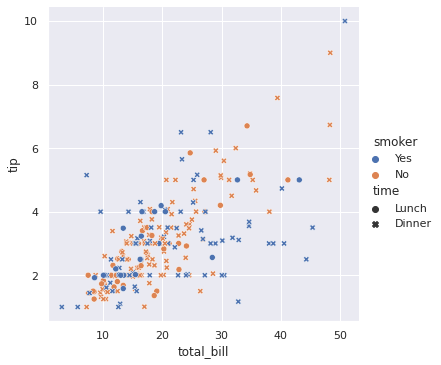

In [26]:
# Agregar multiples variables 
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

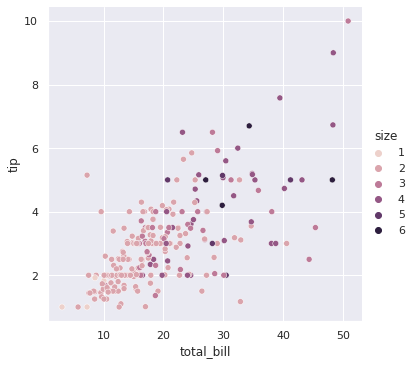

In [27]:
# Agregar dimensiones adicionales continuas
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

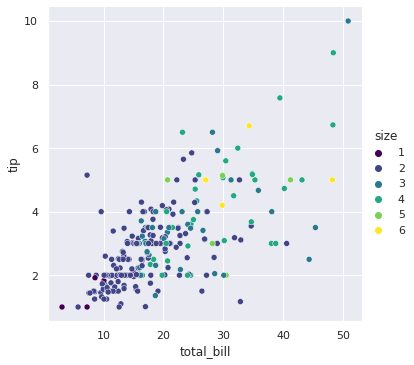

In [28]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips, palette="viridis");

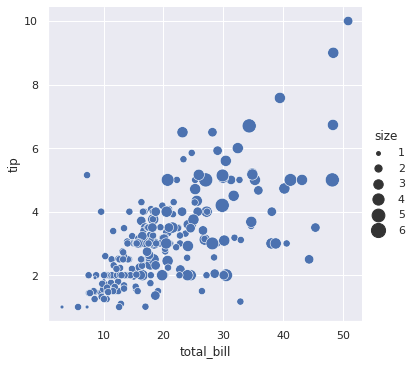

In [29]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

In [30]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,-0.193552
1,1,0.845910
2,2,2.218376
3,3,0.478051
4,4,-0.190906


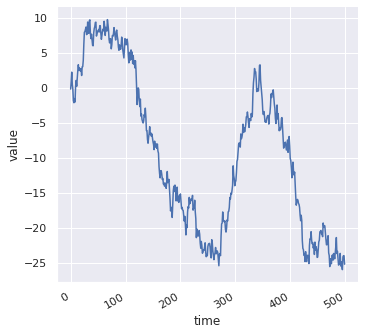

In [31]:
# El comportamiento usual es ordenar primero las "x" y luego dibujar "y"
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

 

In [32]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
df.head()

,x,y
0,-0.319245,0.711847
1,-0.917117,0.681873
2,-0.617616,1.077371
3,0.487289,3.208522
4,0.471340,2.607214


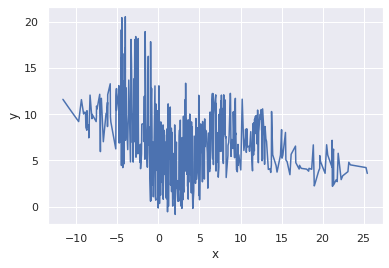

In [33]:
sns.lineplot(x="x", y="y", data=df);

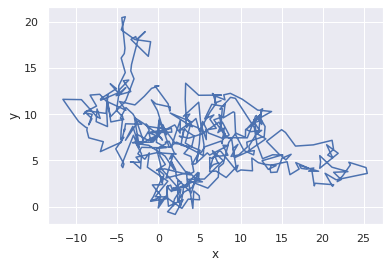

In [34]:
sns.lineplot(x="x", y="y", sort=False, data=df);

In [35]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


En este caso hay varias observaciones `timepoint` con distinto valor de `signal`, entonces `lineplot` hace lo siguiente 

- Remueve las repeticiones usando un estimador de ellas. Por defecto es el promedio. 
- Se estima un intervalo de 95% usando bootstrap.  

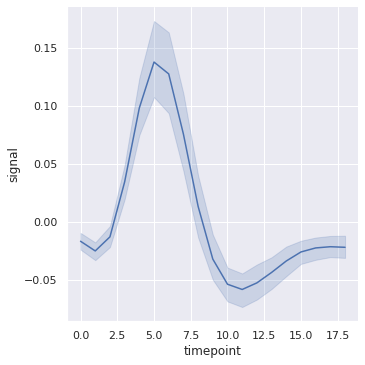

In [36]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

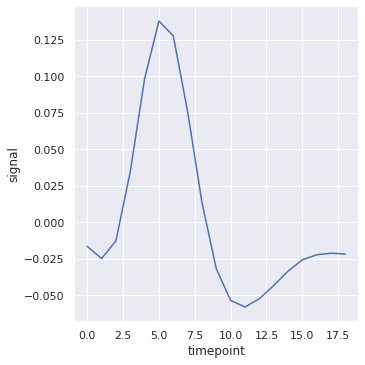

In [37]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

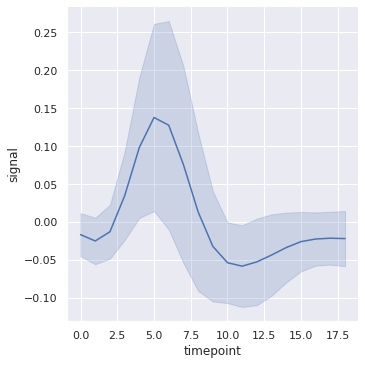

In [38]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

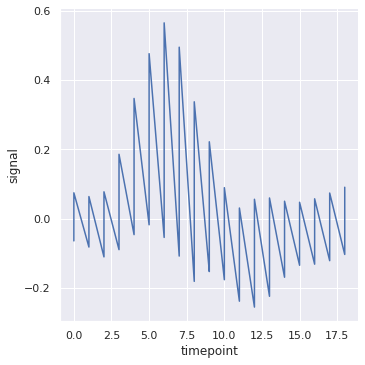

In [39]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

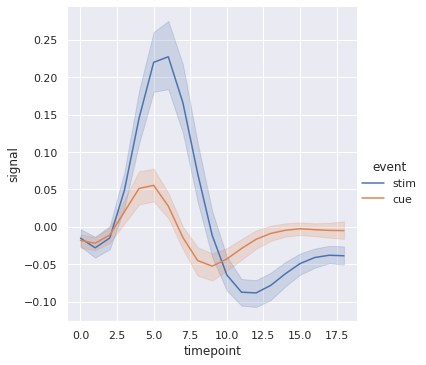

In [40]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

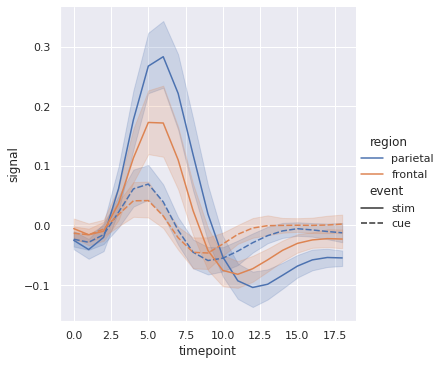

In [41]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri);

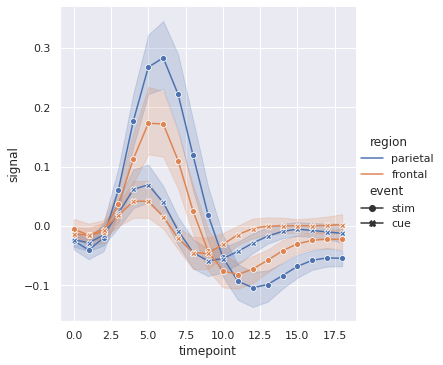

In [42]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", dashes=False,
            markers=True, kind="line", data=fmri);

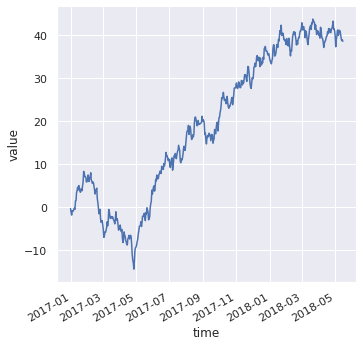

In [43]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

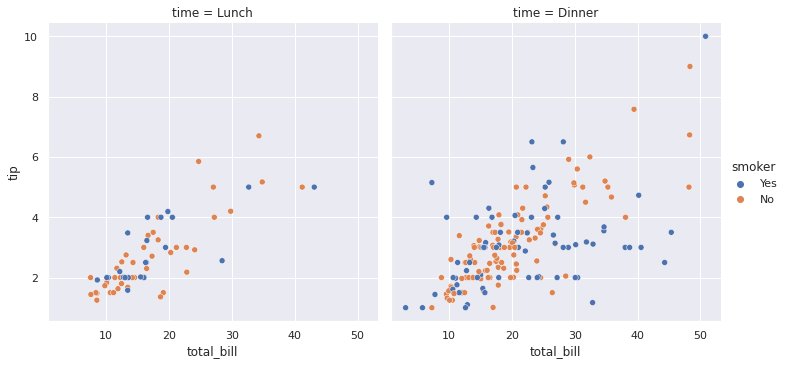

In [44]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

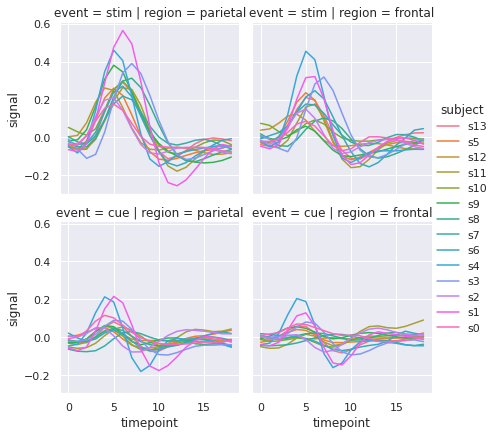

In [45]:
# Usando el parámetro row pueden dibujar por filas el contenido del data.frame
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

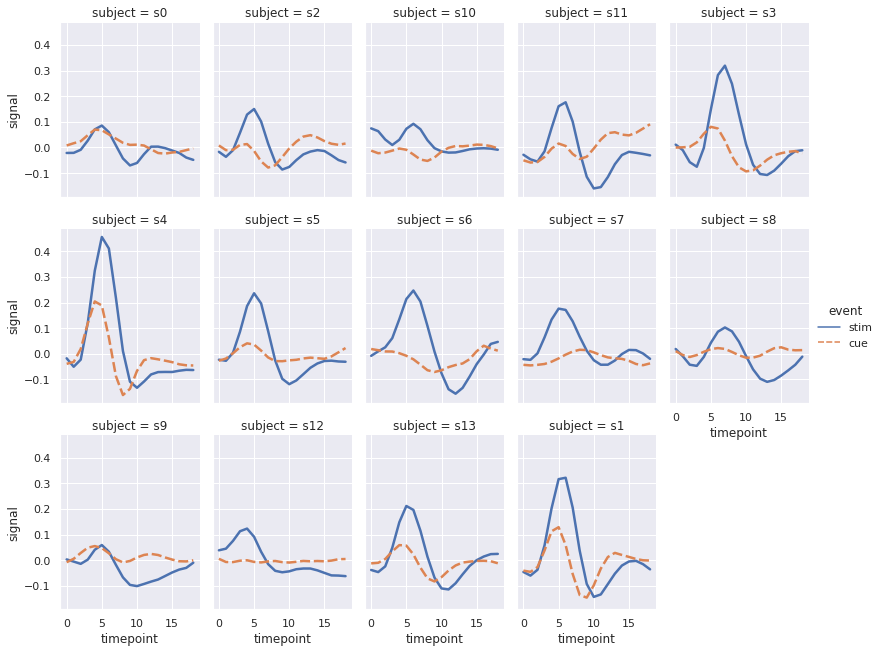

In [46]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

# Visualizando distribuciones. 

Como se mencionó al inicio de este libro, la función `displot` puede dibujar distribuciones de forma bastante sencilla en `seaborn`. 




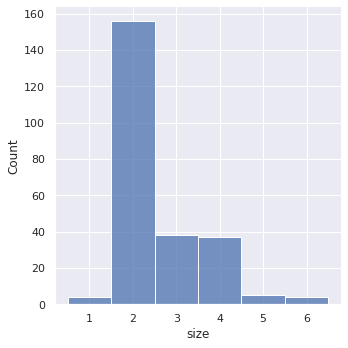

In [47]:
sns.displot(tips, x="size", discrete = True)


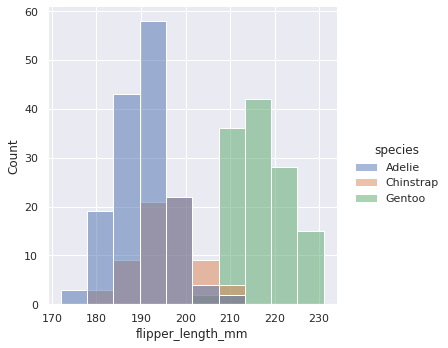

In [48]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

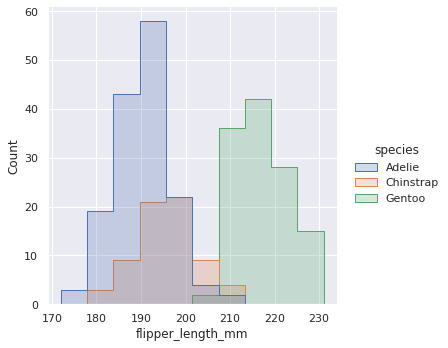

In [49]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

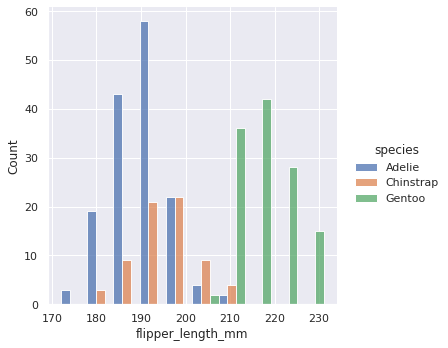

In [50]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="dodge")

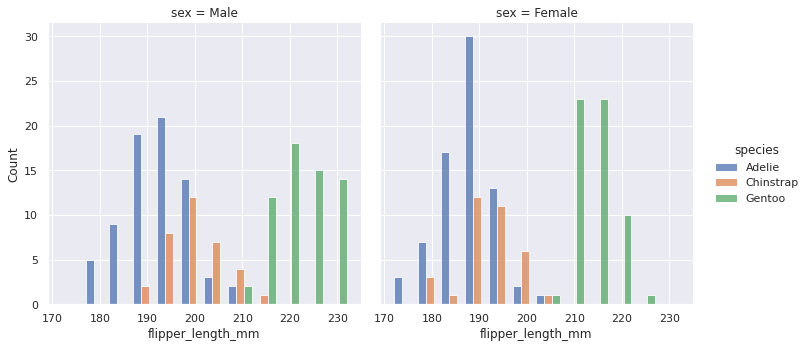

In [51]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="dodge", col="sex", binwidth=5)

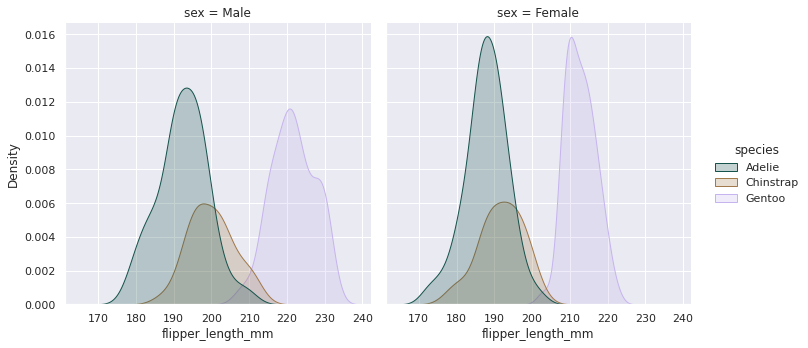

In [52]:
sns.displot(penguins, x="flipper_length_mm", kind = "kde",
            hue="species", col="sex", fill=True, palette= "cubehelix")

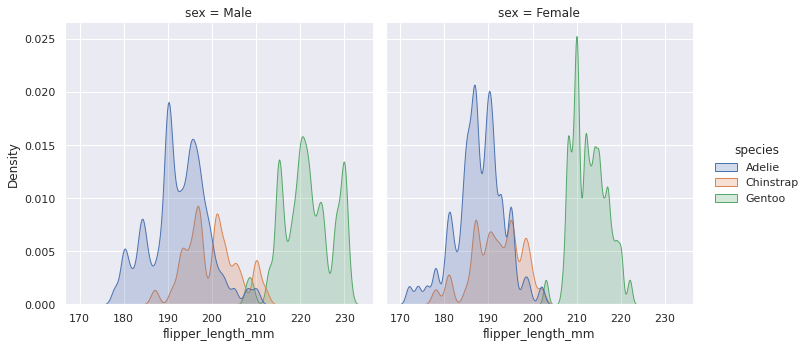

In [53]:
sns.displot(penguins, x="flipper_length_mm", kind = "kde",
            hue="species", col="sex", fill=True, bw_adjust=0.3)


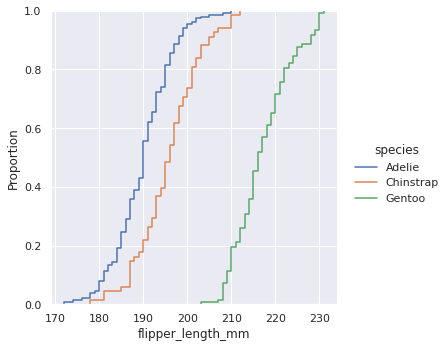

In [54]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

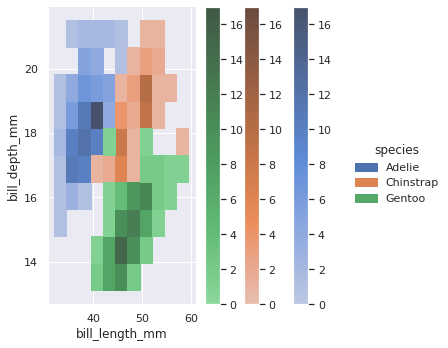

In [55]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", cbar = True)

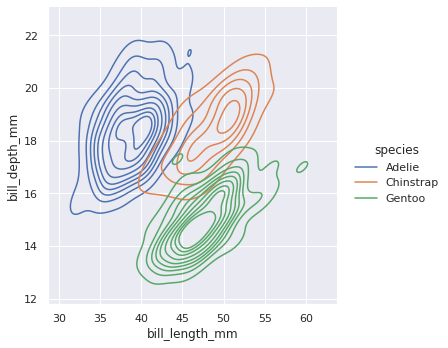

In [56]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

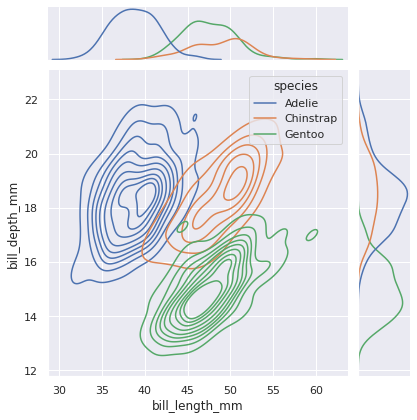

In [57]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

La función `jointplot` es solo una simplificación de la función `JointGrid`. Esta última tiene una mayor flexibilidad. 

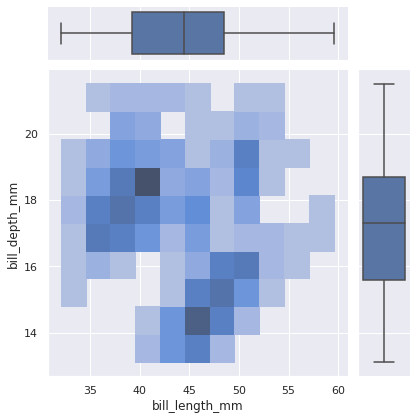

In [58]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

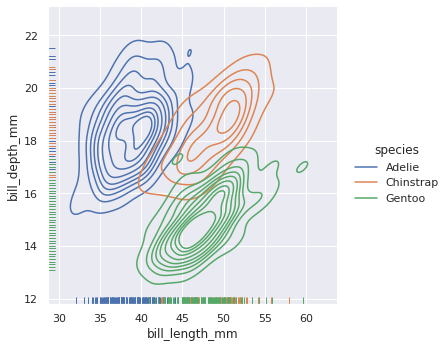

In [59]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", hue ="species", rug=True
)


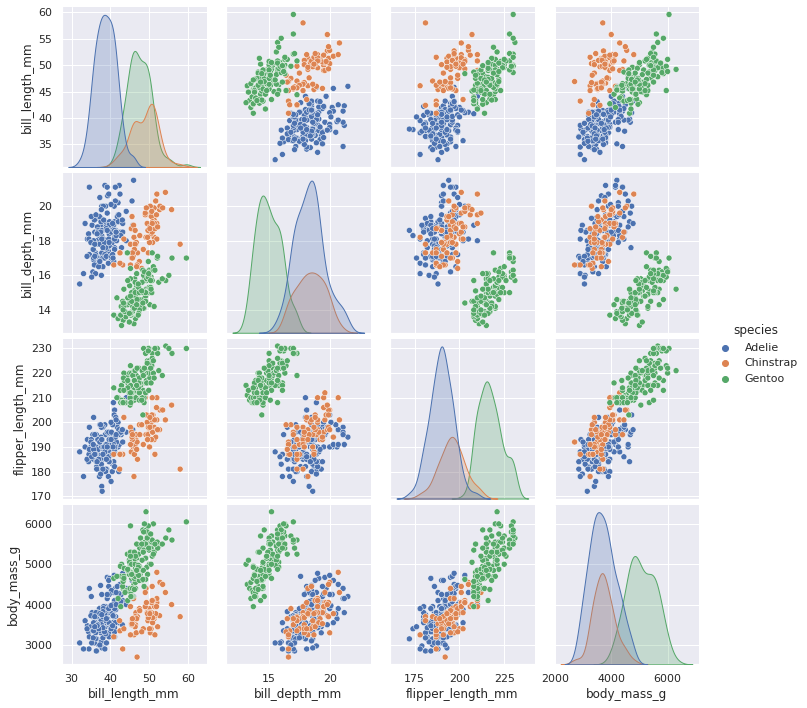

In [60]:
sns.pairplot(penguins, hue= "species")

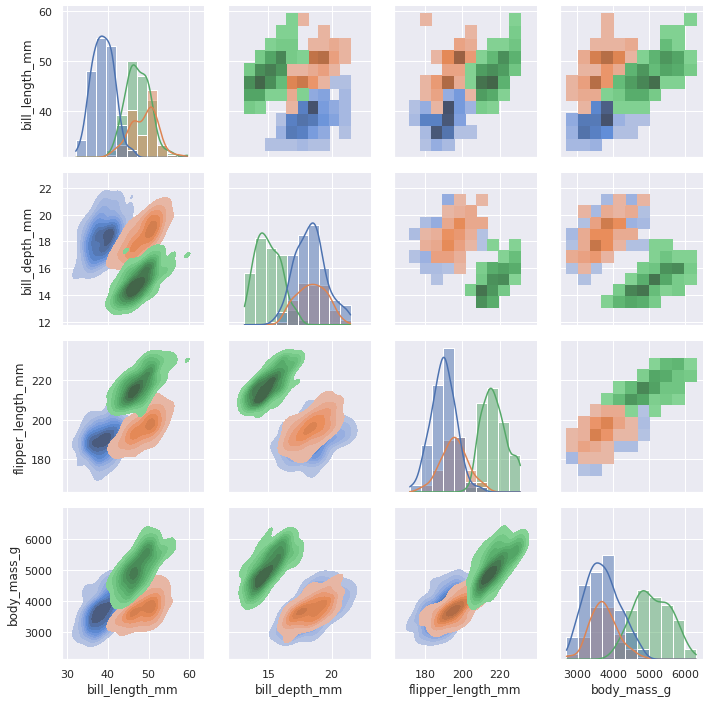

In [61]:
g = sns.PairGrid(penguins, hue="species")
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

## Datos categóricos

El análisis de datos categóricos posee herramientas gráficas propias que pueden clasificarse en tres grupos: diagramas de dispersión, diagramas de distribuciones y diagramas de resúmenes de datos categóricos.

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

Base de prueba:

In [63]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


El primer tipo de gráfico permite visualizar dispersión por cada nivel de la variable categórica (la coordenada x de cada punto se altera aleatoriamente):

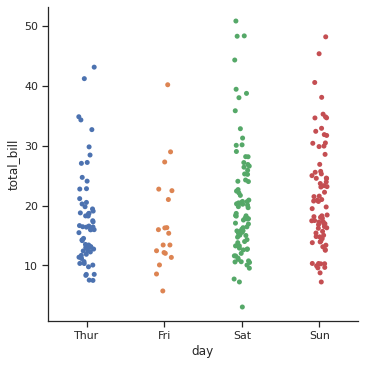

In [64]:
sns.catplot(x="day", y="total_bill", data=tips);  # jitter=True

Otra opción permite representar aproximadamente la distribución de los puntos por categoría (gráfico de enjambre): 

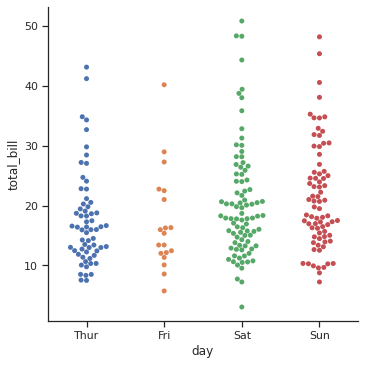

In [65]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

Los gráficos anteriores se pueden combinar con una dimensión adicional:

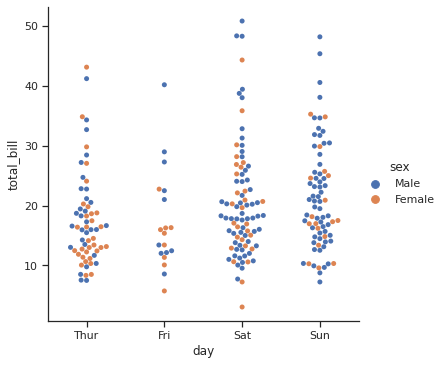

In [66]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

Una opción muy útil es el cambiar el orden de los niveles para una variable categórica. Seaborn maneja esto facílmente:

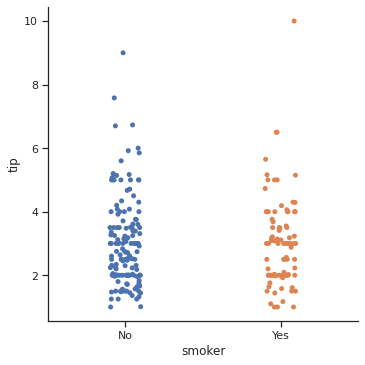

In [67]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

Los gráficos anteriores pueden ser muy restrictivos a la hora de describir la distribución de valores por cada categoría. En ese caso es mejor usar diagramas de caja:

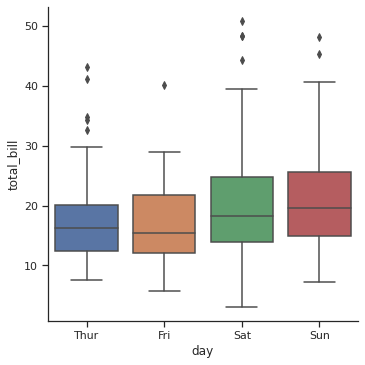

In [68]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

Al igual que en el caso anterior, el diagrama de caja se puede combinar con una dimensión adicional:

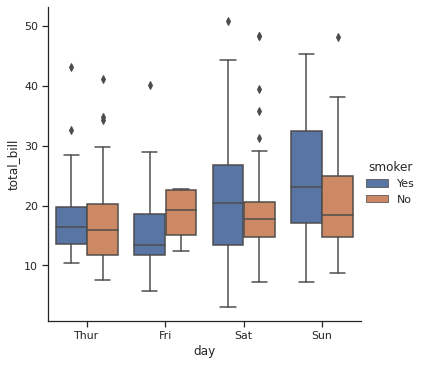

In [69]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

Un `boxenplot` extiende un diagrama de caja para incluir más percentiles en aquellas categorías donde haya más dispersión:

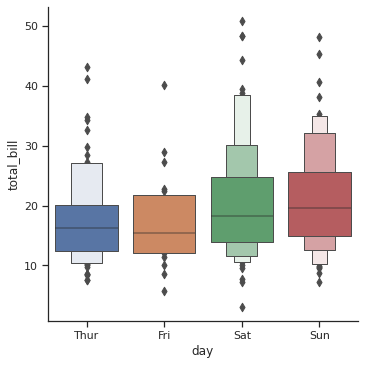

In [70]:
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips);

Otra posibilidad para representar la dispersión es un `violinplot`, que combina un diagrama de caja con estimación por kernel:

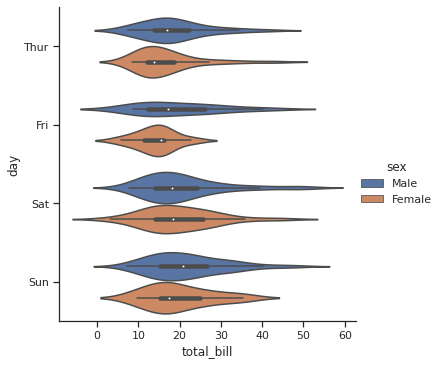

In [71]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", data=tips);

En el caso de que haya una variable auxiliar de dos niveles, el violinplot se puede combinar:

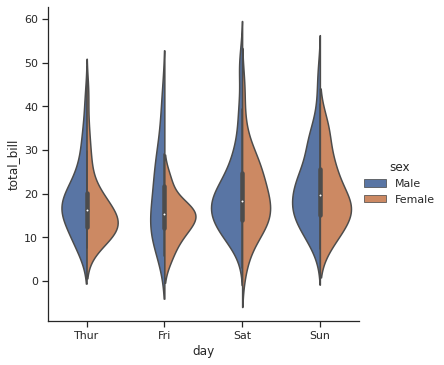

In [72]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

Si queremos graficar resúmenes de datos categóricos, podemos usar un `barplot` para mostrar el valor medio de una variable por nivel junto con una estimación de la incertidumbre de ese estadístico:

In [73]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


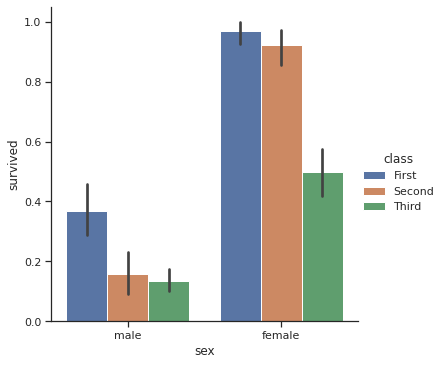

In [74]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

o bien también podemos graficar el número de ocurrencias de cada nivel de la variable a través de un `countplot`:

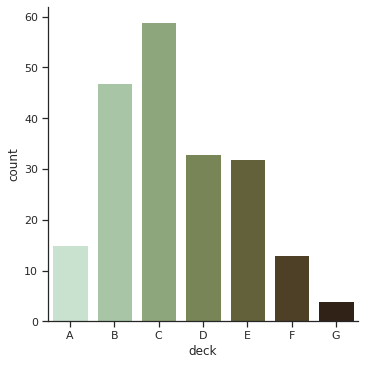

In [75]:
sns.catplot(x="deck", kind="count", palette="ch:1", data=titanic);

Gráficos similares se pueden obtener a través de un `pointplot`:

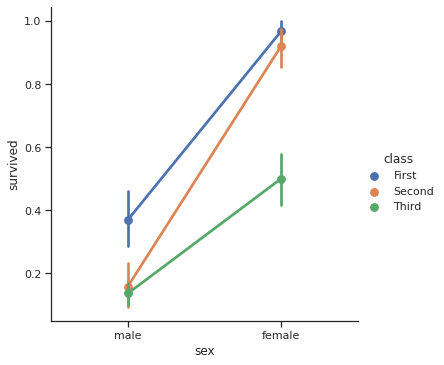

In [76]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

Todos los gráficos anteriores pueden ser estructurados a través de *facets*, con la misma función `catplot`:

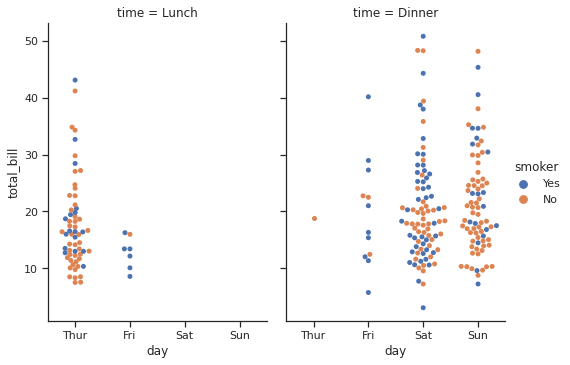

In [77]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.7,
            kind="swarm", data=tips);

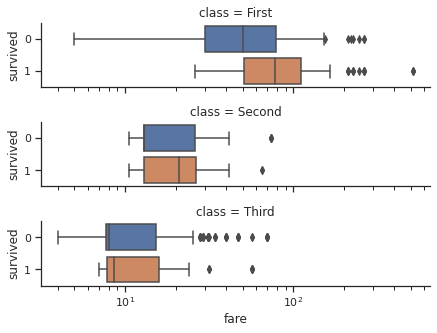

In [78]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

## Aspectos adicionales de gráficos múltiples

Al representar múltiples gráficos en seaborn, internamente se llama `FaceGrid` junto con sus argumentos *column*, *row* o *hue*:

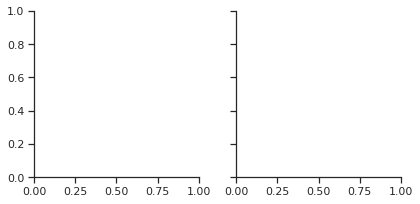

In [79]:
g = sns.FacetGrid(tips, col="time")

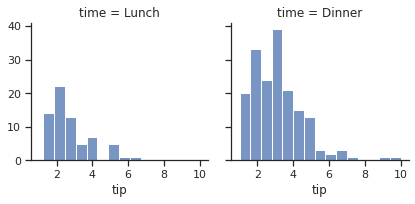

In [80]:
g.map(sns.histplot, "tip");

Otro ejemplo:

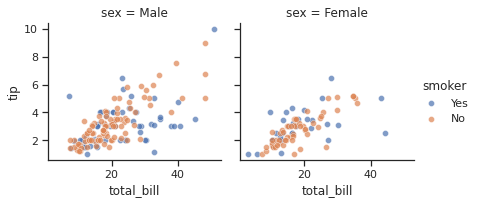

In [81]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend();

FacetGrid también permite controlar gráficos que usen solamente la opción `hue`: 

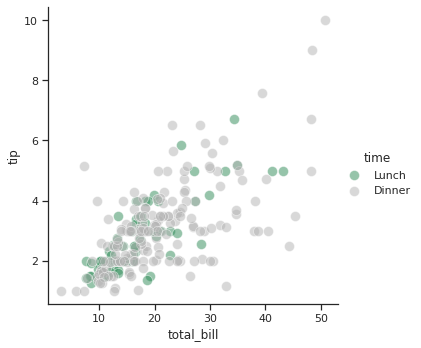

In [82]:
pal = dict(Lunch="seagreen", Dinner=".7")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(sns.scatterplot, "total_bill", "tip", s=100, alpha=.5)
g.add_legend();

El argumento `wrap` permite agrupar los gráficos con un número considerable de niveles:

In [83]:
attend = sns.load_dataset("attention").query("subject <= 12")
attend.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


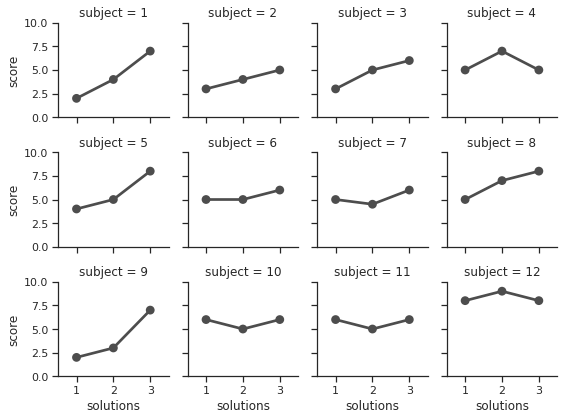

In [84]:
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", ci=None);

También es posible definir funciones arbitrarias que tengan como output un gráfico, y utilizarlas dentro del map de FacetGrid para hacer arreglos:

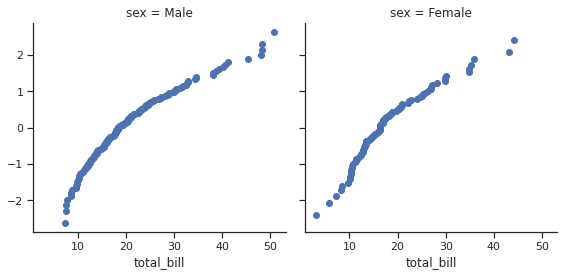

In [85]:
from scipy import stats
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill");

Finalmente, Seaborn tiene la función `PairGrid` que permite hacer matrices de arreglos donde se mapeen variables que permitan ser relacionadas por pares, generalizando la función `pairplot` que vimos en clases anteriores:

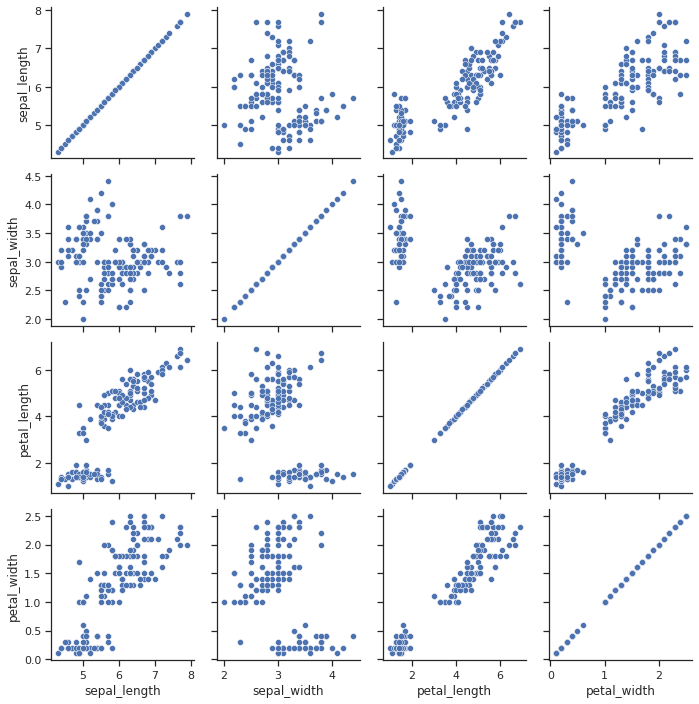

In [86]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(sns.scatterplot);

En la diagonal de estos arreglos, podemos usar otro tipo de gráfico que no indique asociación, por ejemplo un histograma. Asimismo, también podemos usar la opción `hue` para incluir una dimensión adicional:

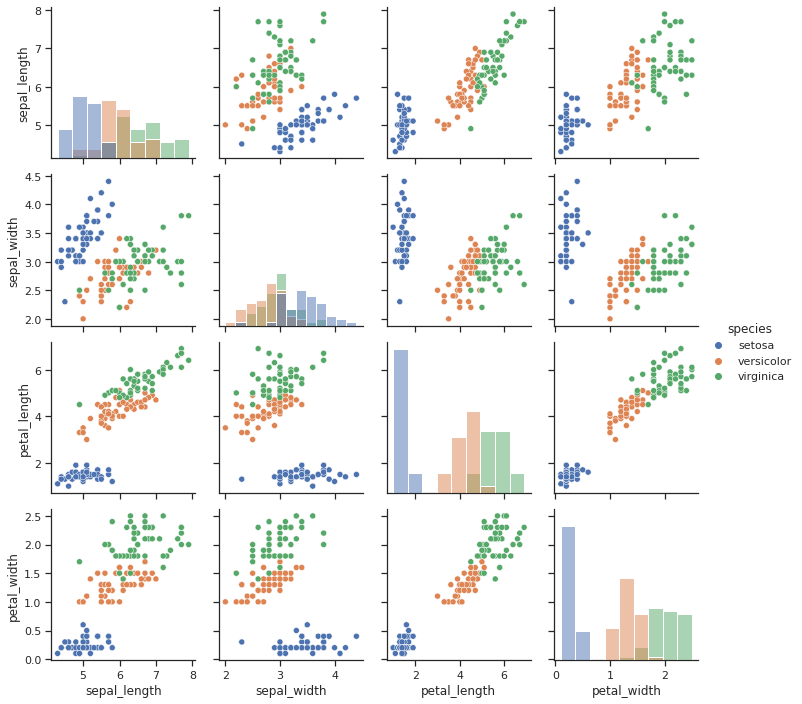

In [87]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

También se puede definir un gráfico distinto para la sección triangular superior e inferior del arreglo:

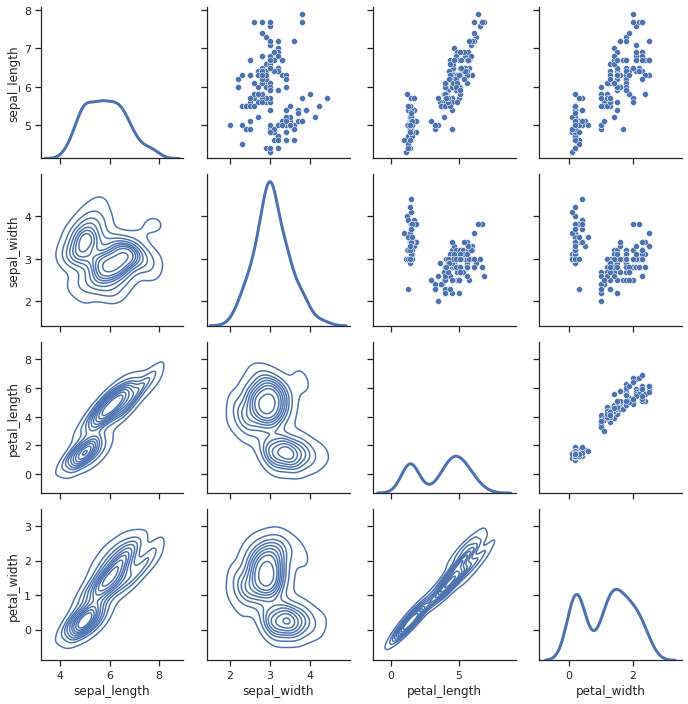

In [88]:
g = sns.PairGrid(iris)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);